# Batch Regression (Learning Rate effect)


- Test Normal Equation 
- Test Cost function
- Test derivative of Cost function
- Test Graident Descent
- Test Hypothies function



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('csv_files/ex1data1.csv')
df.head()

,city_population,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'food_truck_profit')

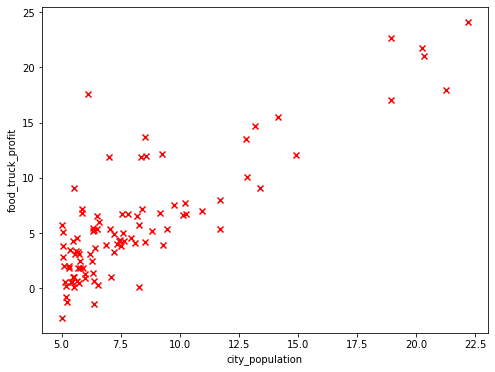

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(df['city_population'], df['food_truck_profit'], c='r',marker='x')
plt.xlabel('city_population')
plt.ylabel('food_truck_profit')

# Functions to help

In [4]:
def init_2d_graphs(*colors):
    plt.style.use(colors) # color of your 2d graph
    plt.figure(figsize=(10,6)) # set the figure size
    return True

In [5]:
init_2d_graphs('ggplot' )

True

<Figure size 720x432 with 0 Axes>

In [6]:
def display(thets_1, costs):
    plt.figure(figsize=(10, 6))
    plt.scatter(thets_1,costs, c='r', s=100, marker='.')
    plt.plot(thets_1,costs,  linewidth=2)
    plt.xlabel("thets_1")
    plt.ylabel("Cost")

In [7]:
def graph_fit_line(thets_0, thets_1):
    # Plot the graph with first 4 values of thetas and last values of thetas
    plt.figure(figsize=(10, 6))
    for i in range(3):
        y_hat = np.matmul(X, np.array([thets_0[i], thets_1[i]]).reshape(-1,1))
        plt.plot(X[:, 1], y_hat, label='predict ' + str(i+1), linewidth=2)
    y_hat = np.matmul(X, np.array([thets_0[-1], thets_1[-1]]).reshape(-1,1))
    plt.plot(X[:, 1], y_hat, label= 'last predict',linewidth=2)

    plt.scatter(X[:, 1],y, s = 100, c = 'r', marker = 'X', label =  'Training data')

    plt.title("The Relation between " + 'Population of City in 10,000s' + " And " + 'Profit in $10,000s' )
    plt.legend()
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

In [8]:
def display_values(thets_1, grd_vector, costs):
    print(thets_1[0], "##", grd_vector[0],"##", costs[0])
    print(thets_1[1], "##",grd_vector[1], "##",costs[1])
    print(thets_1[2],"##", grd_vector[2], "##",costs[2])
    print(thets_1[3], "##",grd_vector[3],"##", costs[3])
    print(thets_1[4],"##", grd_vector[4],"##", costs[4])
    print(thets_1[5],"##", grd_vector[5], "##",costs[5])
    print(thets_1[-1],"##", grd_vector[9], "##",costs[-1])

In [9]:
def intilize():
    X = np.array(df['city_population'])
    y = np.array(df['food_truck_profit'])
    X = X.reshape(-1, 1)
    print(X.shape)

    # Add x0
    X = np.c_[np.ones((X.shape[0], 1)), X]

    y = y.reshape(-1, 1)
    X_T = X.T
    thets_0 = []
    thets_1 = []
    costs = []
    grd_vector = []
    
    
    print(X.shape)
    print(y.shape)
    print(X_T.shape)
    
    return X, y, X_T, thets_0, thets_1, costs, grd_vector

# Test Normal Equation (closed form)

thetas = (X.T X)-1  X.T Y

We have 1 feature but add X0 = 1, will have 2 features

In [10]:
X, y, X_T, thets_0, thets_1, costs, grd_vector = intilize()

(97, 1)
(97, 2)
(97, 1)
(2, 97)


In [11]:
thetas_closed_form = np.linalg.inv(X_T.dot(X)).dot(X_T).dot(y)
print(thetas_closed_form.shape)
print(thetas_closed_form)

(2, 1)
[[-3.89578088]
 [ 1.19303364]]


In [12]:
predict_y = X.dot(thetas_closed_form)
predict_y[:3]

array([[3.39377399],
       [2.6989512 ],
       [6.26719552]])

In [13]:
X = np.array(df['city_population'])
y = np.array(df['food_truck_profit'])
X = X.reshape(-1,1)
print(X.shape)
lin_reg = LinearRegression()
lin_reg.fit(X, y)


(97, 1)


LinearRegression()

In [14]:
lin_reg.intercept_, lin_reg.coef_ # looks like what we get using Normal equation

(-3.895780878311852, array([1.19303364]))

In [15]:
predict_y = lin_reg.predict(X[:3])
predict_y[:3]

array([3.39377399, 2.6989512 , 6.26719552])

# Test Graident Descent

In [16]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)

(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


# Cost function (Convex Shape)
 
The cost function has three different parameters all are just fixed (does not change) except thetas here's (thetas batch)

- m is fixed number is about number of instances in your dataset
- X is about all your instances in the dataset and for each instance all the features it has
- y is the actual value of the instances in your data like when X 6.1101 y was 17.5920

So the cost function actually changes according to changes in these **thetas_batch**, and these values of **thetas_batch** change according to the **derivative of cost function with regard to each parameter theta** which till the gradient descent which direction should take to minimize the cost function.

When you make the **derivative of the cost function with regard to each parameter theta** you know how each of these parameters contributes to the error of the cost function, and then you change these parameters.

In [17]:
def cost_function(X, y, thetas_batch):
    m = X.shape[0]
    
    j = (1/(2*m)) * np.matmul((X.dot(thetas_batch) - y).T, (X.dot(thetas_batch) - y))
    return j.reshape(-1)[0]

# Gradient Descent

The change in the paramters thetas have another factor which is the **learning rate** after we compute the **the gradient of the cost function with regard to each parameter theta** to know which dierction we will take , it depends on the partial derivative of the cost function if we can see this image below, lets check just for one paramter theta_1.

<img src="33.png">

if we need to minimize the cost function, then we will check the partial derivative and in this case, the slope is positive, and when we subtract ** theta_1 = theta_1 - (learning_rate * graident_vector_theta1)** from positive slope will change the theta_1 on the x-axis to be small and that what we need to minimize the cost function.

**But** as we can see the **learning_rate** is what control this step on the graph but the step is going to be smaller as you close to the global minimum because of multiplication process.

**Watch this video**

https://www.coursera.org/learn/neural-networks-deep-learning/lecture/A0tBd/gradient-descent

In [18]:
def batch_gradient(X, y, thetas_batch, learning_rate, iterations = 10):
    m = X.shape[0]
    
    for i in range(iterations):
        
        '''
        You need to compute the gradient of the cost function with regard to each parameter theta,
        in other words, you need to calculate how much the cost function will change if you change theta,
        just a little bit. this is called the partial derivative.
        '''
        graident_vector = (1/m) * (X.T.dot(X.dot(thetas_batch) - y))
        grd_vector.append(round(graident_vector[1][0], 2))
        thetas_batch = thetas_batch - (learning_rate * graident_vector)
        thets_0.append(round(thetas_batch[0][0],2))
        thets_1.append(round(thetas_batch[1][0],2))
        costs.append(round(cost_function(X,y, thetas_batch),2))
    
    return costs, thets_0, thets_1


# check learning_rate=.01 (Optimal Value)



In [19]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))
costs, thets_0, thets_1 = batch_gradient(X, y, thetas_batch, .01, 10)

(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


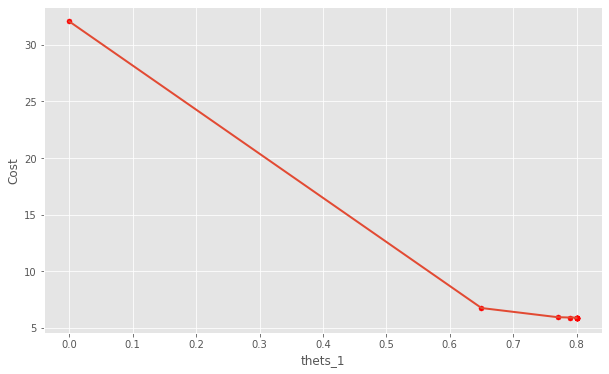

In [20]:
# Look how the slope is negative as it change in the graph 
display(thets_1, costs)

# Note !
**the learning rate looks pretty good: injust a few iterations, it has already converged to the solution**

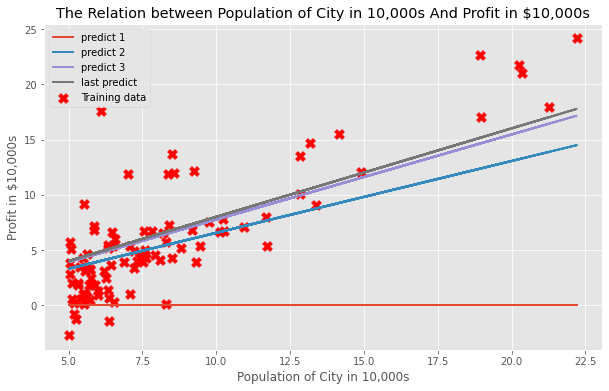

In [21]:
graph_fit_line(thets_0, thets_1)

In [22]:
display_values(thets_1, grd_vector, costs)

0.0 ## -65.33 ## 32.072733877455676
0.65 ## -11.67 ## 6.74
0.77 ## -2.13 ## 5.93
0.79 ## -0.44 ## 5.9
0.8 ## -0.14 ## 5.9
0.8 ## -0.08 ## 5.89
0.8 ## -0.07 ## 5.86


# Now lets check how learning_rate work

learning_rate = .01

(**the partial derivative of the cost function is negative**) means the slope is negative so we will increase theta 1 because theta_1 - -(learning_rate * graident_vector_theta1) will be theta_1 + (learning_rate * graident_vector_theta1).


You now should notice that when the cost is bigger then the parameters theta that contributes to this error need to take a big step of change and you can see from 32.07 to 6.74, then the errors be small so the change in these parameters is small.


- So theta_1 = 0.0 - (.01 * -65.33)    = 0.65, and the cost = 32.07, then
- theta_1 =  0.65 - (.01 * -11.67) = 0.65 + 0.1167      = 0.77 and the cost   = 6.74
- theta_1 = 0.77 - (.01 * -2.13)   = 0.77 +  0.0213     =  0.79 and the cost  = 5.93
- theta_1 = 0.79 - (.01 * -0.44)   =  .79 + .0044       = 0.8  and the cost   = 5.9
    
Then as you can see a littile bit of changes

# check learning_rate=.025 (Too big value)

"On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before, This might make the model diverge, with larger and larger values, failing to find a good solution."

Look how the sloop changes arbitrary from positive to negative.

In [23]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))
costs, thets_0, thets_1 = batch_gradient(X, y, thetas_batch, .025, 10)

(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


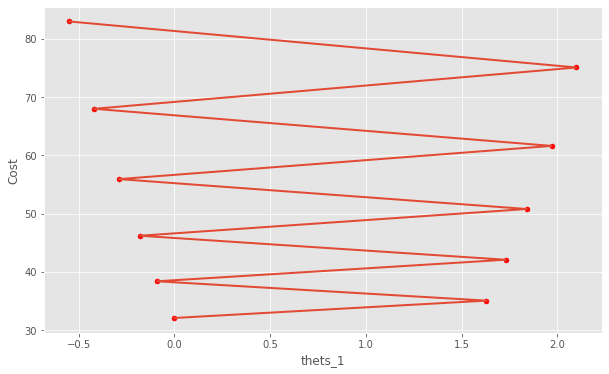

In [24]:
#Look how the slope change arbitrary from negative to positive as its changes in the graph
display(thets_1, costs)

# Note !
Look how the prediction change from first(red color) to second prediction(blue color), then how the last prediction underfitting the data.

**the learning  rate  is  too  high:  the  algorithm  diverges,  jumping  all  over  the  place  and  actually getting further and further away from the solution at every step**

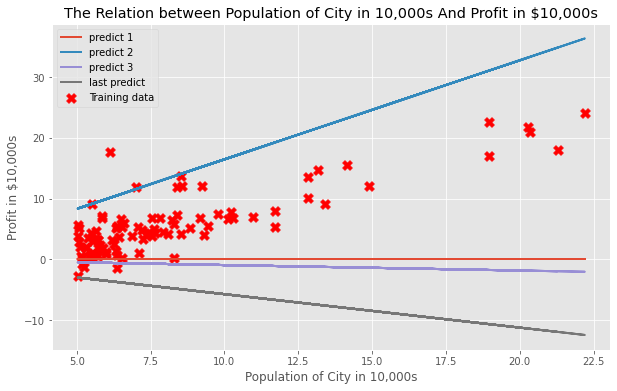

In [25]:
graph_fit_line(thets_0, thets_1)

In [26]:
display_values(thets_1, grd_vector, costs)

0.0 ## -65.33 ## 32.072733877455676
1.63 ## 68.81 ## 35.05
-0.09 ## -72.79 ## 38.37
1.73 ## 76.69 ## 42.07
-0.18 ## -81.09 ## 46.19
1.84 ## 85.46 ## 50.78
-0.55 ## 106.12 ## 82.97


# check learning_rate=.0001 (Too small value)

When the learning rate is too small the model will have to go through many iterations to converge, which will take too much time and too many iterations see from cost function of **32** to **5.87** in **10** iteration when the learning rate was **.01** and it goes from **32** to **28.46** when the learning rate was **.0001** in the same number of iterations **10** so in this case, you will need too many iterations to converge and get to the global minimum.

In [27]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))
costs, thets_0, thets_1 = batch_gradient(X, y, thetas_batch, .0001, 10)

(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


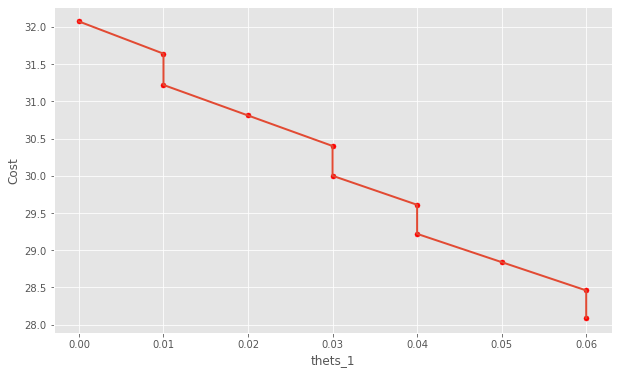

In [28]:
#Look how the negative slope changes in the graph 
# (too baby steps each time and it will take too much time to converage as well)

display(thets_1, costs)

# Note !
**the algorithm will eventually reach the solution, but it will take a long time.**

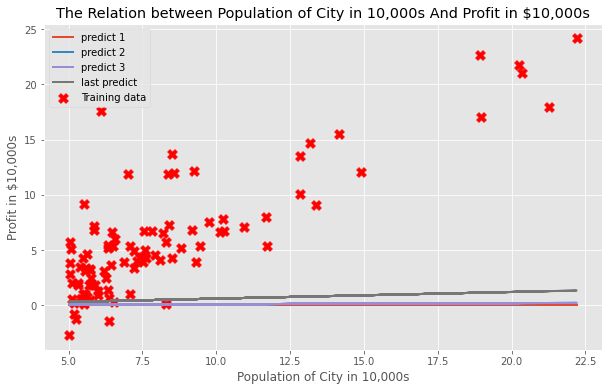

In [29]:
graph_fit_line(thets_0, thets_1)

In [30]:
display_values(thets_1, grd_vector, costs)

0.0 ## -65.33 ## 32.072733877455676
0.01 ## -64.79 ## 31.64
0.01 ## -64.26 ## 31.22
0.02 ## -63.73 ## 30.81
0.03 ## -63.21 ## 30.4
0.03 ## -62.69 ## 30.0
0.06 ## -60.66 ## 28.09


# Now lets get close values as Normal equations

We have the optimal learning rate is **.01**, but to get a closed value as a Normal equation we need to wait for a large number of iterations.

In [31]:
thetas_closed_form

array([[-3.89578088],
       [ 1.19303364]])

In [32]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))
costs, thets_0, thets_1 = batch_gradient(X, y, thetas_batch, .01, 1500)

(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


In [33]:
# Look how they are closed ^^
print(np.array([thets_0[1499], thets_1[1499]]))

[-3.63  1.17]


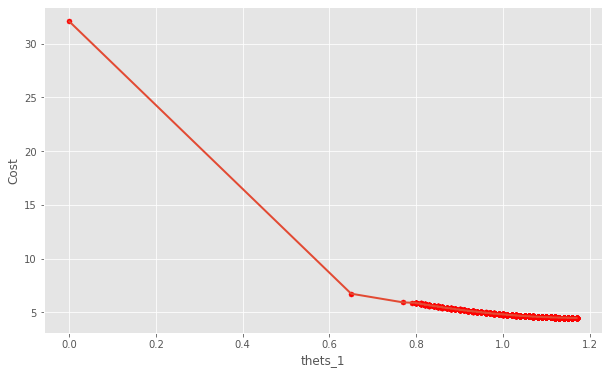

In [34]:
display(thets_1, costs)

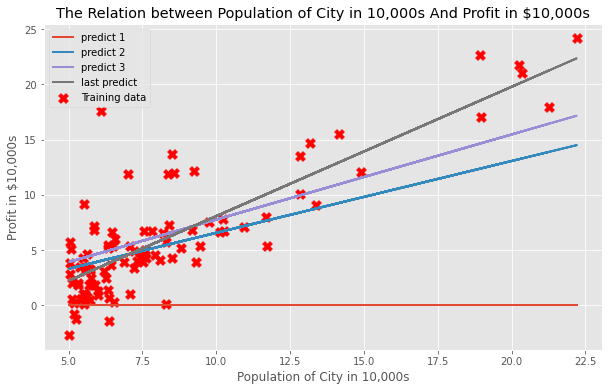

In [35]:
graph_fit_line(thets_0, thets_1)

In [36]:
display_values(thets_1, grd_vector, costs)

0.0 ## -65.33 ## 32.072733877455676
0.65 ## -11.67 ## 6.74
0.77 ## -2.13 ## 5.93
0.79 ## -0.44 ## 5.9
0.8 ## -0.14 ## 5.9
0.8 ## -0.08 ## 5.89
1.17 ## -0.07 ## 4.48


# Summary

## Normal Equation (Get Best weights directly)

**Get the best weights that minimize the cost function very well directly**

The normal equation gets very slow when the number of features grows large for example**(100,000)**. But the positive side is it goes a linear for the number of instances in your data O(m), so it can handle a large training set efficiently, provided they can fit in the memory and the number of features is not too large.

## Batch Graident Descent (Get best weights iteratively)

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

The word **Batch** means that for each iteration in the Gradient Descent we patch the whole dataset of the training.

"As a result it is terribly slow on very large train‐ing sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number offeatures; training a Linear Regression model when there are hun‐dreds of thousands of features is much faster using Gradient Descent than using the Normal Equation"


There are different ways to find a good learning rate:
- Graid Search
- Random Search

**But a good way is too look at different scale(zoom out) of the learning rate value and see the effect when you zoom in with the grid search in the scale you find that it can give a good solution.**

Other hyperparamters is the number of iterations we used, but you can set to larage value say 2000 iterations and use the **tolerance ε**, and stop the learning when the different between two graident vectors is too small which value smaller than this **ε** tolerance. (when  its  norm  becomes  smaller  than  a  tinynumber  ε ),  this happen because as we can see that the partial derivative of the cost function with regard to the parameters is goes to be small as we reach the global minimum.

## Cost Function (Convex Shape)
Because MSE (Mean Square Error) is convex shape and why? lets imgine x = -5 then the MSE(-5) = 25 because of square of - is positive, if x=0 it will be 0 if x=5 then MSE = 25 also.

It something looks like this, so there are no local minima, just one global minimum.

<img src="covex.png">

"Fortunately, the MSE cost function for a Linear Regression model happens to be aconvex function, which means that if you pick any two points on the curve, the linesegment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have a great consequence: Gradient Descentis guaranteed to approach arbitrarily close the global minimum (if you wait longenough and if the learning rate is not too high)."